Código Regressão 01 de Thiago

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, lilliefors
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro, anderson
from sklearn.datasets import make_regression


In [3]:
# Example Data:
dados = pd.read_csv('../dataset/Notas.csv', encoding='latin1')
print(dados.head())
x1 = dados['Tempo_Rev']
x2 = dados['Tempo_Sono']
y = dados['Notas']

   Tempo_Rev  Tempo_Sono  Notas
0         45         7.5     75
1         52         8.0     80
2         48         7.0     72
3         50         8.5     85
4         47         7.8     78


In [4]:
# Standard Example:
np.random.seed(123)
n = 1000
x1 = np.random.normal(50, 10, n)
x2 = x1  # + np.random.normal(50, 10, n)
y = -x1 + x2 - 40 + np.random.normal(0, 5, n)
dados = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

In [6]:
np.random.seed(123)
n = 1000
dias = np.arange(1, n + 1)
x1 = np.random.normal(50,10,n)
x2 = x1 + np.random.normal(50,10,n)
residuos_dependentes = np.random.normal(0,1,n)

for i in range(1,n):
    residuos_dependentes[i] += 0.7 * residuos_dependentes[i-1]
y = -x1 + x2 - 40 + residuos_dependentes
dados = pd.DataFrame({'dias': dias, 'x1': x1, 'x2': x2, 'y': y})

In [8]:
X = dados[['x1', 'x2']]
X = add_constant(X)
model = OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 2.394e+04
Date:                Mon, 05 Aug 2024   Prob (F-statistic):               0.00
Time:                        22:21:19   Log-Likelihood:                -1744.1
No. Observations:                1000   AIC:                             3494.
Df Residuals:                     997   BIC:                             3509.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -40.0741      0.324   -123.742      0.0

<Axes: >

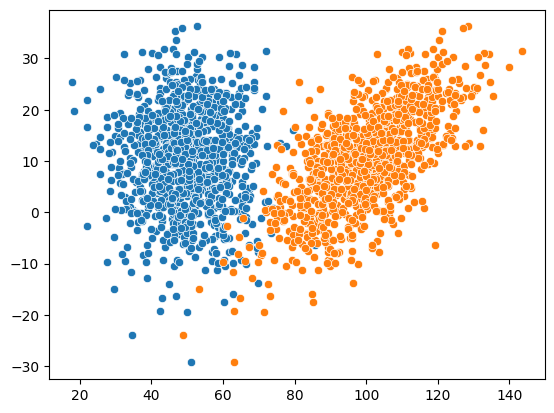

In [9]:
# Graphical Analysis: Scatter Plot vs. OLS Model
sns.scatterplot(x=x1, y=y)
sns.scatterplot(x=x2, y=y)

In [11]:
X

,const,x1,x2
0,1.0,39.143694,81.655419
1,1.0,59.973454,115.649402
2,1.0,52.829785,110.011290
3,1.0,34.937053,74.943245
4,1.0,44.213997,98.962981
...,...,...,...
995,1.0,56.347631,114.804644
996,1.0,60.699186,99.499961
997,1.0,40.906730,87.313763
998,1.0,54.702637,88.605687


In [10]:
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Variable        VIF
0    const  54.571955
1       x1   2.027924
2       x2   2.027924


In [12]:
if any(vif_data['VIF'] > 10):
    print('Existem variáveis altamente correlacionadas.')
else:
    print('Não existem variáveis altamente correlacionadas.')

Existem variáveis altamente correlacionadas.


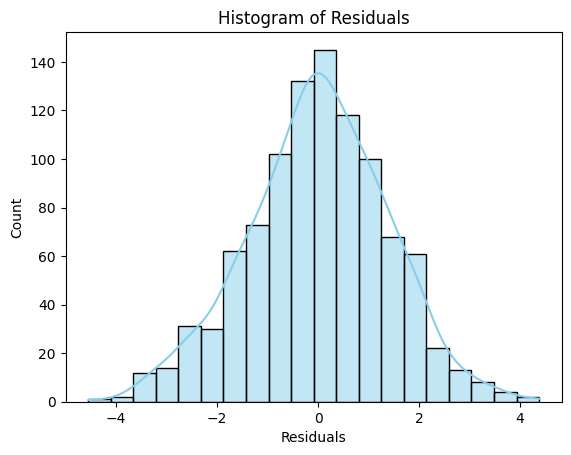

In [13]:
residuals = model.resid
sns.histplot(residuals, bins=20, kde=True, color='skyblue')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.show()

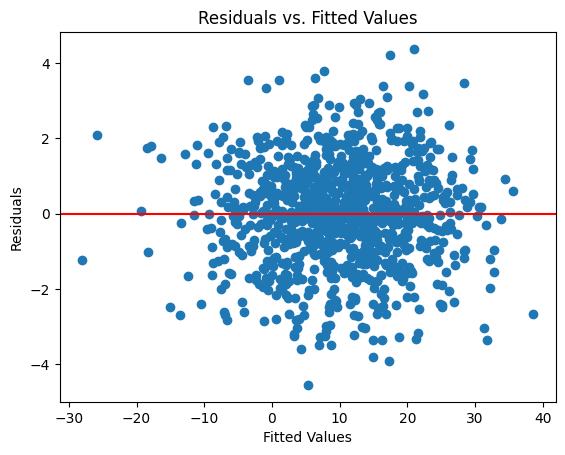

In [14]:
fitted_values = model.fittedvalues
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [17]:
shapiro_test = shapiro(residuals)
p_value = shapiro_test.pvalue
if p_value > 0.05:
    print('Resíduos são normalmente distribuídos.')
else:
    print('Resíduos não são normalmente distribuídos.')

Resíduos são normalmente distribuídos.


In [21]:
ad_test = anderson(residuals)
if ad_test.statistic < ad_test.critical_values[2]:
    print(f'The statistic is: {ad_test.statistic:.2g}. Resíduos são normalmente distribuídos.')
else:
    print(f'The statistic is: {ad_test.statistic:.2g}. Resíduos não são normalmente distribuídos.')

The statistic is: 0.72. Resíduos são normalmente distribuídos.


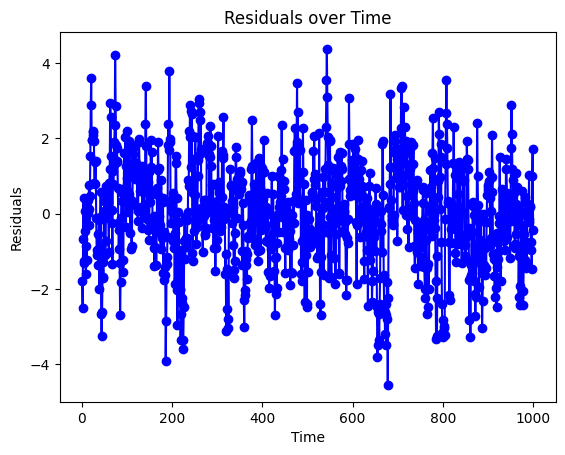

In [22]:
# Graphical Analysis: Residuals over time
plt.plot(dados['dias'], residuals, 'b-', marker='o')
plt.title("Residuals over Time")
plt.xlabel("Time")
plt.ylabel("Residuals")
plt.show()

In [23]:
# Durbin-Watson Test
dw_test = durbin_watson(residuals)
print(f"Durbin-Watson statistic: {dw_test:.2f}")

if dw_test < 1.5 or dw_test > 2.5:
    print(f"The Durbin-Watson statistic is: {dw_test:.2f}. Therefore, the residuals are not independent.")
else:
    print(f"The Durbin-Watson statistic is: {dw_test:.2f}. Therefore, the residuals are independent.")


Durbin-Watson statistic: 0.59
The Durbin-Watson statistic is: 0.59. Therefore, the residuals are not independent.


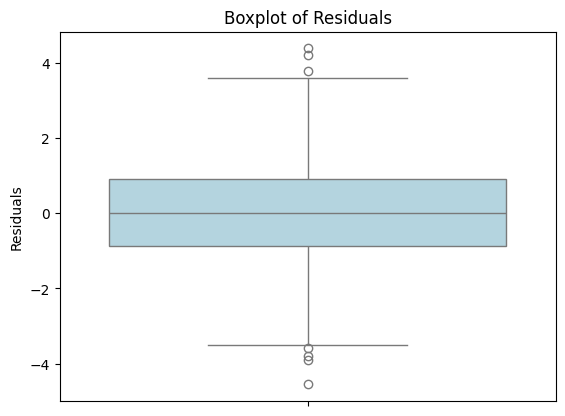

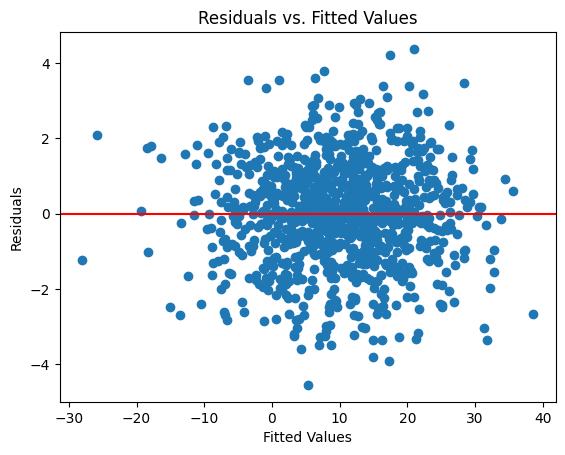

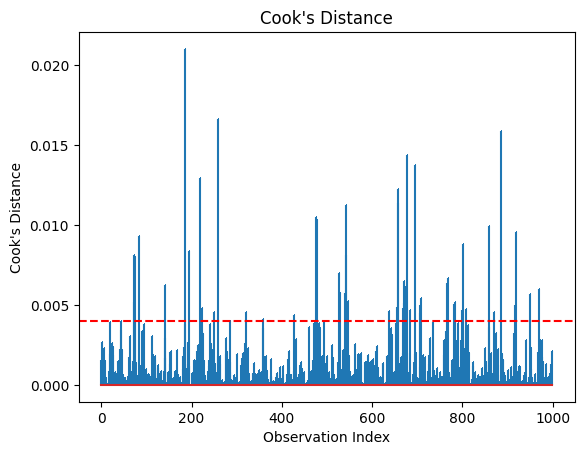

Influential points: [ 72  73  74  75  84 142 185 195 218 224 250 259 284 321 358 427 476 478
 527 528 540 541 542 543 546 638 654 657 658 669 670 671 672 676 677 683
 694 706 707 708 766 768 781 784 798 801 807 858 871 886 917 918 950 969]


In [24]:
## Existence of Outliers:
# Boxplot of residuals for visual identification of outliers
sns.boxplot(y=residuals, color='lightblue')
plt.title("Boxplot of Residuals")
plt.ylabel("Residuals")
plt.show()

# Residuals vs. Fitted Values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# Cook's Distance
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.title("Cook's Distance")
plt.xlabel("Observation Index")
plt.ylabel("Cook's Distance")
plt.axhline(y=4/n, linestyle='--', color='red')
plt.show()

# Identifying influential points
influential_points = np.where(cooks_d > 4/n)[0]
print(f"Influential points: {influential_points}")

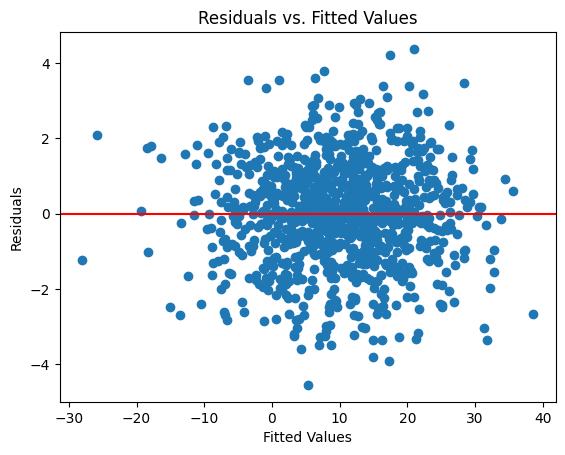

In [25]:
## Homoscedasticity:
# Graphical Analysis: Plot of residuals vs. fitted values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red')
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [28]:
# Breusch-Pagan Test
bp_test = het_breuschpagan(residuals, model.model.exog)
p_value = bp_test[1]
if p_value > 0.05:
    print(f"The p-value is: {p_value:.2g}. Therefore, we have homoscedasticity.")
else:
    print(f"The p-value is: {p_value:.2g}. Therefore, we have heteroscedasticity.")

The p-value is: 0.67. Therefore, we have homoscedasticity.


In [30]:
exog = add_constant(np.column_stack((fitted_values, fitted_values**2)))

# White Test
white_test = het_breuschpagan(residuals, exog)
p_value = white_test[1]
if p_value > 0.05:
    print(f"The p-value is: {p_value:.2g}. Therefore, we have homoscedasticity.")
else:
    print(f"The p-value is: {p_value:.2g}. Therefore, we have heteroscedasticity.")

The p-value is: 0.91. Therefore, we have homoscedasticity.


 A homocedasticidade é uma suposição importante nos modelos de regressão linear. A heterocedasticidade pode indicar que o modelo não está capturando todos os padrões da relação entre as variáveis,